##**Importing Libraries**

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xg
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

##**Data Collection and Processing**

In [ ]:
movies_data = pd.read_csv("movies.dat", sep='::', engine='python', header=None, encoding='latin1')
ratings_data = pd.read_csv("ratings.dat", sep='::', engine='python', header=None, encoding='latin1')
users_data = pd.read_csv("users.dat", sep='::', engine='python', header=None, encoding='latin1')

In [ ]:
movies_data.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies_data.describe()

,0
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [ ]:
movies_data.shape

(3883, 3)

In [ ]:
movies_data.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   1       3883 non-null   object
 2   2       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
ratings_data.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings_data.describe()

,0,1,2,3
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [ ]:
ratings_data.shape

(1000209, 4)

In [ ]:
ratings_data.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [ ]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   0       1000209 non-null  int64
 1   1       1000209 non-null  int64
 2   2       1000209 non-null  int64
 3   3       1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
users_data.head()

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users_data.describe()

,0,2,3
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [ ]:
users_data.shape

(6040, 5)

In [ ]:
users_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
# Rename columns in the dataframes
movies_data.columns = ['MovieID', 'Title', 'Genres']
ratings_data.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
users_data.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode']

In [ ]:
print(movies_data.head())
print(ratings_data.head())
print(users_data.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   UserID Gender  Age  Occupation ZipCode
0       1      F    1          10   48067
1       2      M   56          16   70072
2       3      M   25          15   55117
3       4      M   45           7   02460
4       5      M   25          20   55455


In [ ]:
# Merge the dataframes
data = pd.merge(movies_data, ratings_data, on='MovieID')
data = pd.merge(data, users_data, on='UserID')

In [ ]:
data.shape

(1000209, 10)

In [ ]:
data.describe()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [ ]:
data.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
ZipCode       0
dtype: int64

In [ ]:
data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,ZipCode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [ ]:
data.head(1)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,ZipCode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067


In [ ]:
# Taking only 5,00,000 data frames from the data
subset_data = data.head(500000)

In [ ]:
data.shape

(1000209, 10)

In [ ]:
subset_data.shape

(500000, 10)

##**Data Visualization**

In [ ]:
data['Genres'].value_counts()

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64

In [ ]:
data['Gender'].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

In [ ]:
data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [ ]:
data['Title'].value_counts()

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Elstree Calling (1930)                                      1
Waltzes from Vienna (1933)                                  1
Uninvited Guest, An (2000)                                  1
Five Wives, Three Secretaries and Me (1998)                 1
Heaven's Burning (1997)                                     1
Name: Title, Length: 3706, dtype: int64

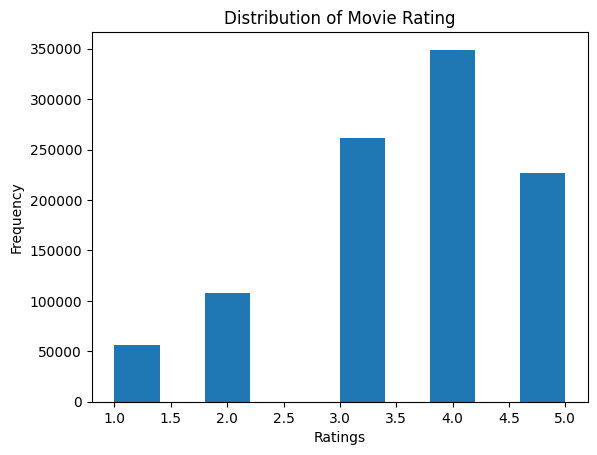

In [ ]:
# Histogram of movie ratings
plt.hist(data['Rating'])
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Rating")
plt.show()

**Visualize the average rating of movies by different age groups**

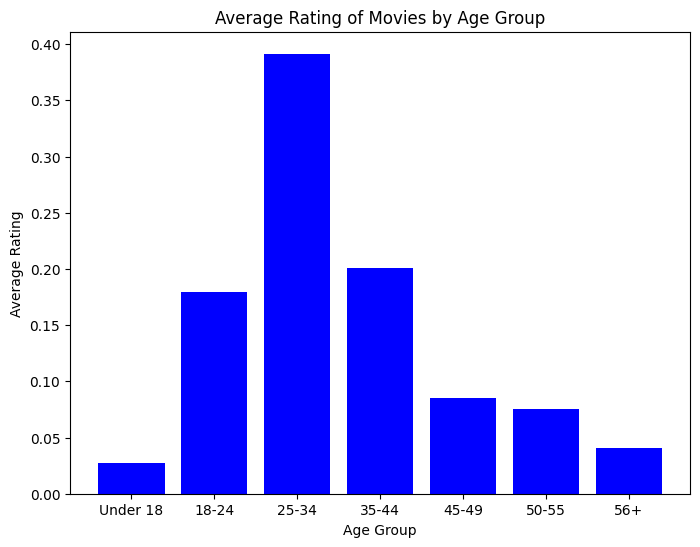

In [ ]:
# Calculate the average rating for each age group
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
average_ratings = [0] * len(age_groups)

for index, row in data.iterrows():
    age = row['Age']
    rating = row['Rating']

    if age < 18:
        average_ratings[0] += rating
    elif age < 25:
        average_ratings[1] += rating
    elif age < 35:
        average_ratings[2] += rating
    elif age < 45:
        average_ratings[3] += rating
    elif age < 50:
        average_ratings[4] += rating
    elif age < 56:
        average_ratings[5] += rating
    else:
        average_ratings[6] += rating

# Calculate the actual average ratings
total_ratings = data['Rating'].sum()
average_ratings = [rating_sum / total_ratings for rating_sum in average_ratings]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(age_groups, average_ratings, color='blue')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Average Rating of Movies by Age Group')
plt.show()

**Visualize the distribution of movie genres using a bar plot.**

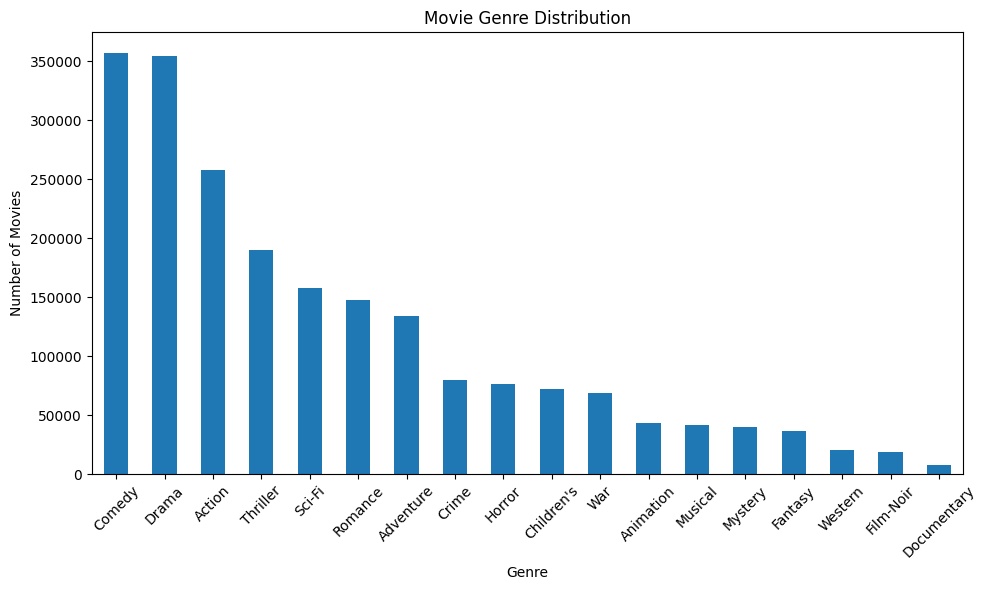

In [ ]:
# Count the occurrences of each genre
genre_counts = data['Genres'].str.split('|', expand=True).stack().value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movie Genre Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Visualize the top-rated movies based on average ratings.**

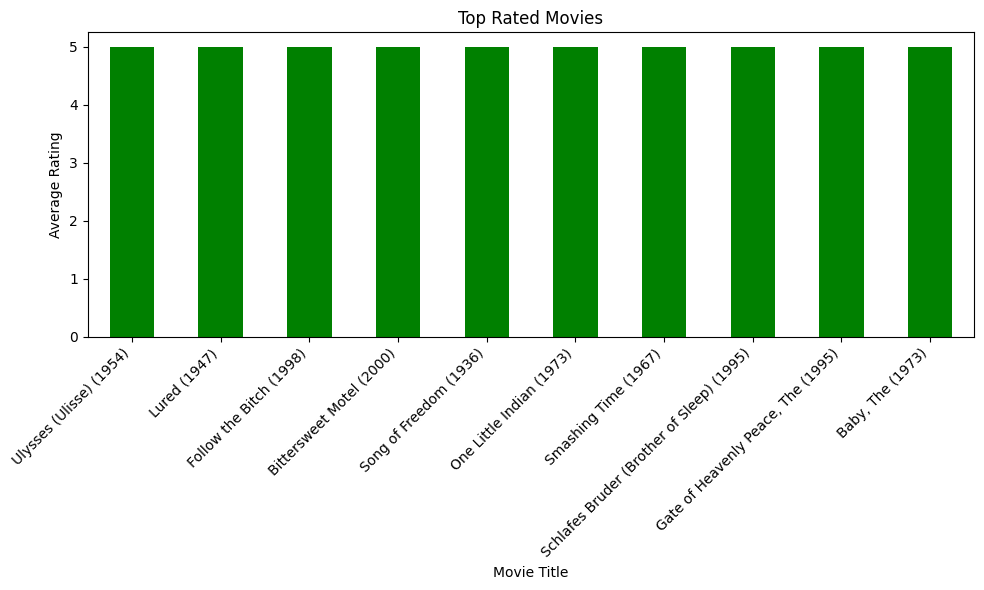

In [ ]:
# Calculate average ratings for each movie
movie_avg_ratings = data.groupby('Title')['Rating'].mean().sort_values(ascending=False)[:10]

# Create a bar plot for top rated movies
plt.figure(figsize=(10, 6))
movie_avg_ratings.plot(kind='bar', color='green')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title('Top Rated Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Visualize the distribution of user ages.**

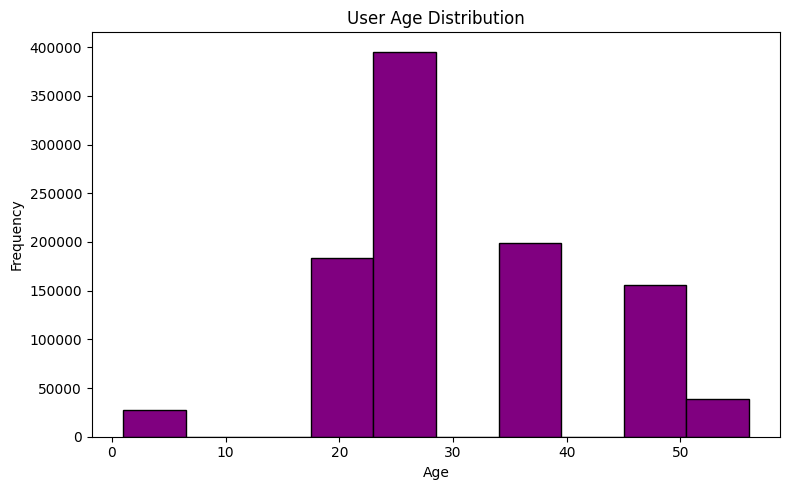

In [ ]:
# Create a histogram for user ages
plt.figure(figsize=(8, 5))
plt.hist(data['Age'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('User Age Distribution')
plt.tight_layout()
plt.show()

##**Separating Target and features**

In [ ]:
x = data[['Title', 'Genres', 'Timestamp', 'Gender', 'Age', 'Occupation']]
y = data['Rating']

In [ ]:
# x = subset_data[['Title', 'Genres', 'Timestamp', 'Gender', 'Age']]
# y = subset_data[['Rating']]

##**Encoding the Categorical Columns**

In [ ]:
# Select categorical columns for one-hot encoding
categorical_columns = ['Title', 'Genres', 'Timestamp', 'Gender', 'Occupation']

In [ ]:
# Perform label encoding on the categorical columns
# label_encoder = LabelEncoder()
# x_encoded = x.copy()
# for column in x.columns:
#    x_encoded[column] = label_encoder.fit_transform(x[column])

In [ ]:
# Apply one-hot encoding to categorical columns
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# x_encoded = pd.DataFrame(encoder.fit_transform(x[categorical_columns]))
# feature_names = encoder.get_feature_names_out(categorical_columns)
# x_encoded.columns = feature_names

In [ ]:
# Apply target encoding to categorical columns
encoder = ce.TargetEncoder(cols=categorical_columns)
x_encoded = encoder.fit_transform(x, y)

In [ ]:
# Print the encoded features
x_encoded.head()

,Title,Genres,Timestamp,Gender,Age,Occupation
0,4.146846,3.879416,3.657898,3.620366,1,3.532675
1,2.976440,2.976440,3.766115,3.620366,1,3.532675
2,4.073541,3.780611,3.749175,3.620366,1,3.532675
3,4.453694,3.904041,3.646198,3.620366,1,3.532675
4,4.510417,4.098936,3.766115,3.620366,1,3.532675


In [ ]:
x_encoded.shape

(1000209, 6)

In [ ]:
y.shape

(1000209,)

##**Splitting the data into train and test data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800167, 6) (200042, 6) (800167,) (200042,)


##**Model Training**

**Using Gradient Boosting Regression(XGBoost) Model**

In [ ]:
model_1 = xg.XGBRegressor()

In [ ]:
model_1.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**Using LogisticRegression Model**

In [ ]:
model_2 = LogisticRegression(max_iter=1000)
# solver='lbfgs', max_iter=1000

In [ ]:
model_2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Using RandomForestClassifier Model**

In [ ]:
model_3 = RandomForestClassifier()
# n_estimators=100, max_depth=10, random_state=2

In [ ]:
model_3.fit(x_train, y_train)

RandomForestClassifier()

**Using DecisionTreeClassifier Model**

In [ ]:
model_4 = DecisionTreeClassifier()
# max_depth=10, random_state=2

In [ ]:
model_4.fit(x_train, y_train)

DecisionTreeClassifier()

##**Model Evaluation**

In [ ]:
# Make predictions and evaluate the model_1
# x_test_prediction_1 = model_1.predict(x_test)
# r2_1 = r2_score(y_test, x_test_prediction_1)
# print("Gradient Boosting Regression(XGBoost) Model\nR-squared Score: ",r2_1)

In [ ]:
# Make predictions and evaluate the model_1
x_test_prediction_1 = model_1.predict(x_test)
r2_1 = r2_score(y_test, x_test_prediction_1)

# Make predictions and evaluate the model_2
x_test_prediction_2 = model_2.predict(x_test)
accuracy_1 = accuracy_score(y_test, x_test_prediction_2)

# Make predictions and evaluate the model_3
x_test_prediction_3 = model_3.predict(x_test)
accuracy_2 = accuracy_score(y_test, x_test_prediction_3)

# Make predictions and evaluate the model_4
x_test_prediction_4 = model_4.predict(x_test)
accuracy_3 = accuracy_score(y_test, x_test_prediction_4)

In [ ]:
print("Gradient Boosting Regression(XGBoost) Model\nR-squared Score: ",r2_1)
print()
print("LogisticRegression Model\nAccuracy Score: ", accuracy_1)
print()
print("RandomForestClassifier Model\nAccuracy Score: ", accuracy_2)
print()
print("DecisionTreeClassifier Model\nAccuracy Score: ", accuracy_3)

Gradient Boosting Regression(XGBoost) Model
R-squared Score:  0.6681585989158138

LogisticRegression Model
Accuracy Score:  0.620824626828366

RandomForestClassifier Model
Accuracy Score:  0.6048079903220324

DecisionTreeClassifier Model
Accuracy Score:  0.5563231721338519
